In [185]:
import cmocean.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## define functions

In [2]:
def lin_fit(m, x, b):
    return m*x + b

In [3]:
def make_results_model(fall_file, winter_file, spring_file, summer_file):
    results_fall = pd.read_csv(fall_file)
    results_fall['season'] = 'fall'
    results_winter = pd.read_csv(winter_file)
    results_winter['season'] = 'winter'
    results_spring = pd.read_csv(spring_file)
    results_spring['season'] = 'spring'
    results_summer = pd.read_csv(summer_file)
    results_summer['season'] = 'summer'

    results_all = pd.concat([results_fall, results_winter, results_spring, results_summer], ignore_index=True)
    results_all = results_all.rename(columns={'Unnamed: 0': 'model'})
    results_201905R = results_all[results_all['model'] == '201905R']
    results_202111 = results_all[results_all['model'] == '202111']
    return results_201905R, results_202111

In [4]:
def bar_chart(results_201905R, results_202111, categories, prod_region):
    results_201905R_r = results_201905R[results_201905R['region'] == prod_region]
    results_202111_r = results_202111[results_202111['region'] == prod_region]

    fig, ax = plt.subplots(2, 4, figsize=(15, 6), sharex='col', sharey='col', gridspec_kw={'width_ratios': [5, 1, 1, 1]})
    fig.suptitle('{} region metric by season'.format(prod_region))

    bar_width = 0.2
    x = np.arange(len(categories))

    ## rmse, crmse, systematic, nonsystematic
    ax[0,0].set_title('model v201905R')
    ax[0,0].grid(axis='y', zorder=0)
    ax[0,0].bar(x - 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][categories].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[0,0].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][categories].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[0,0].bar(x + 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][categories].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[0,0].bar(x + 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][categories].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[0,0].set_xticks(x, categories)
    ax[0,0].legend(ncols=4, loc='center', bbox_to_anchor=(0.5, 0.92))
    ax[0,0].set_ylim([0, 1.2*np.array([np.array(results_201905R_r[categories]).max(), np.array(results_202111_r[categories]).max()]).max()])

    ax[1,0].set_title('model v202111')
    ax[1,0].grid(axis='y', zorder=0)
    ax[1,0].bar(x - 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter'][categories].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[1,0].bar(x - 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring'][categories].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[1,0].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer'][categories].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[1,0].bar(x + 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall'][categories].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[1,0].legend(ncols=4, loc='center', bbox_to_anchor=(0.5, 0.92))

    bar_width=0.10
    ## swillmott
    x = np.array([0])

    ax[0,1].grid(axis='y', zorder=0)
    ax[0,1].bar(x - 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][['swillmott']].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[0,1].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][['swillmott']].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[0,1].bar(x + 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][['swillmott']].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[0,1].bar(x + 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][['swillmott']].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[0,1].set_xticks(x, ['swillmott'])

    ax[1,1].grid(axis='y', zorder=0)
    ax[1,1].bar(x - 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter']['swillmott'].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[1,1].bar(x - 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring']['swillmott'].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[1,1].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer']['swillmott'].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[1,1].bar(x + 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall']['swillmott'].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)

    ## spread
    x = np.array([0])

    ax[0,2].grid(axis='y', zorder=0)
    ax[0,2].bar(x - 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][['spread']].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[0,2].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][['spread']].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[0,2].bar(x + 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][['spread']].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[0,2].bar(x + 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][['spread']].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[0,2].set_xticks(x, ['spread'])

    ax[1,2].grid(axis='y', zorder=0)
    ax[1,2].bar(x - 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter']['spread'].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[1,2].bar(x - 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring']['spread'].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[1,2].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer']['spread'].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[1,2].bar(x + 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall']['spread'].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)

    ## bias
    x = np.array([0])

    ax[0,3].grid(axis='y', zorder=0)
    ax[0,3].bar(x - 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][['bias']].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[0,3].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][['bias']].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[0,3].bar(x + 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][['bias']].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[0,3].bar(x + 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][['bias']].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[0,3].set_xticks(x, ['bias'])

    ax[1,3].grid(axis='y', zorder=0)
    ax[1,3].bar(x - 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter']['bias'].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[1,3].bar(x - 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring']['bias'].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[1,3].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer']['bias'].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[1,3].bar(x + 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall']['bias'].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)

In [120]:
def regressions_and_ts(results_201905R, results_202111, prod_region):
    x_sal = np.linspace(0,35,100)
    ideal_y = lin_fit(m=1, x=x_sal, b=1)

    results_201905R_r = results_201905R[results_201905R['region'] == prod_region]
    results_202111_r = results_202111[results_202111['region'] == prod_region]

    fig, ax = plt.subplots(2, 1, figsize=(6, 8), sharex='col', sharey='col')

    fig.suptitle('{} region obs-model regressions and river timeseries'.format(prod_region))

    ax[0].set_aspect('equal')
    ax[0].plot(x_sal, ideal_y, color='black', alpha=0.5)
    ax[0].set_ylim([0,35])
    ax[0].set_xlim([0,35])
    ax[0].plot(x_sal, lin_fit(x=x_sal, m=1-results_201905R_r[results_201905R_r['season'] == 'winter'][['slopedev']].values[0], b=results_201905R_r[results_201905R_r['season'] == 'winter'][['const']].values[0]), linestyle=(0, (3, 1, 1, 1, 1, 1)), color=color_winter, label='winter', linewidth=2)
    ax[0].plot(x_sal, lin_fit(x=x_sal, m=1-results_201905R_r[results_201905R_r['season'] == 'spring'][['slopedev']].values[0], b=results_201905R_r[results_201905R_r['season'] == 'spring'][['const']].values[0]), linestyle='dotted', color=color_spring, label='spring', linewidth=2)
    ax[0].plot(x_sal, lin_fit(x=x_sal, m=1-results_201905R_r[results_201905R_r['season'] == 'summer'][['slopedev']].values[0], b=results_201905R_r[results_201905R_r['season'] == 'summer'][['const']].values[0]), linestyle='dashed', color=color_summer, label='summer', linewidth=2)
    ax[0].plot(x_sal, lin_fit(x=x_sal, m=1-results_201905R_r[results_201905R_r['season'] == 'fall'][['slopedev']].values[0], b=results_201905R_r[results_201905R_r['season'] == 'fall'][['const']].values[0]), linestyle='dashdot', color=color_fall, label='fall', linewidth=2)
    ax[0].legend(loc='upper left')
    ax[0].set_title('model v201905R')
    ax[0].set_xlabel('obs')
    ax[0].set_ylabel('model')

    ax[1].set_aspect('equal')
    ax[1].plot(x_sal, ideal_y, color='black', alpha=0.5)
    ax[1].set_ylim([0,35])
    ax[1].set_xlim([0,35])
    ax[1].plot(x_sal, lin_fit(x=x_sal, m=1-results_202111_r[results_202111_r['season'] == 'winter'][['slopedev']].values[0], b=results_202111_r[results_202111_r['season'] == 'winter'][['const']].values[0]), linestyle=(0, (3, 1, 1, 1, 1, 1)), color=color_winter, label='winter', linewidth=2)
    ax[1].plot(x_sal, lin_fit(x=x_sal, m=1-results_202111_r[results_202111_r['season'] == 'spring'][['slopedev']].values[0], b=results_202111_r[results_202111_r['season'] == 'spring'][['const']].values[0]), linestyle='dotted', color=color_spring, label='spring', linewidth=2)
    ax[1].plot(x_sal, lin_fit(x=x_sal, m=1-results_202111_r[results_202111_r['season'] == 'summer'][['slopedev']].values[0], b=results_202111_r[results_202111_r['season'] == 'summer'][['const']].values[0]), linestyle='dashed', color=color_summer, label='summer', linewidth=2)
    ax[1].plot(x_sal, lin_fit(x=x_sal, m=1-results_202111_r[results_202111_r['season'] == 'fall'][['slopedev']].values[0], b=results_202111_r[results_202111_r['season'] == 'fall'][['const']].values[0]), linestyle='dashdot', color=color_fall, label='fall', linewidth=2)
    ax[1].set_title('model v202111')
    ax[1].set_xlabel('obs')
    ax[1].set_ylabel('model')

## set notebook values

<AxesSubplot: >

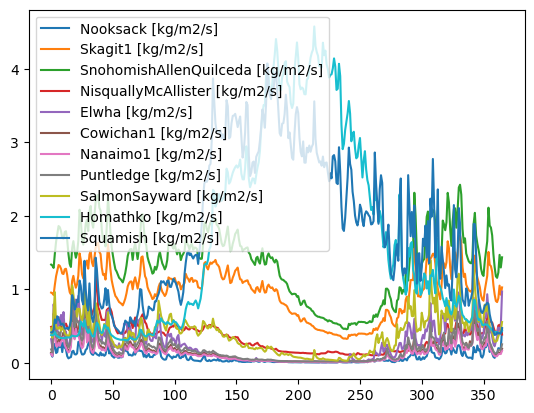

In [121]:
river_dict = {'Nooksack': 'Nooksack [kg/m2/s]', 'Skagit': 'Skagit1 [kg/m2/s]', 'Snohomish': 'SnohomishAllenQuilceda [kg/m2/s]', 'Nisqually': 'NisquallyMcAllister [kg/m2/s]', 'Elwha': 'Elwha [kg/m2/s]', 'Cowichan': 'Cowichan1 [kg/m2/s]', \
              'Nanaimo': 'Nanaimo1 [kg/m2/s]', 'Puntledge': 'Puntledge [kg/m2/s]', 'Salmon': 'SalmonSayward [kg/m2/s]', 'Homathko': 'Homathko [kg/m2/s]', 'Squamish': 'Squamish [kg/m2/s]'}

river_flows_202108 = pd.read_csv('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/river_dailies_to_ts_subset_202108_20130101_20201231.csv')
river_flows_202108 = river_flows_202108.loc[:, river_flows_202108.columns != 'Unnamed: 0']

river_flows_202108['date'] = pd.to_datetime(river_flows_202108['date'])
river_flows_202108['month'] = river_flows_202108['date'].dt.month
river_flows_202108['dayofyear'] = river_flows_202108['date'].dt.dayofyear
daily_clim_202108 = river_flows_202108.groupby(['dayofyear']).mean(numeric_only=True).reset_index()

daily_clim_202108.loc[:, (daily_clim_202108.columns != 'dayofyear') & (daily_clim_202108.columns != 'month')].plot()

<AxesSubplot: >

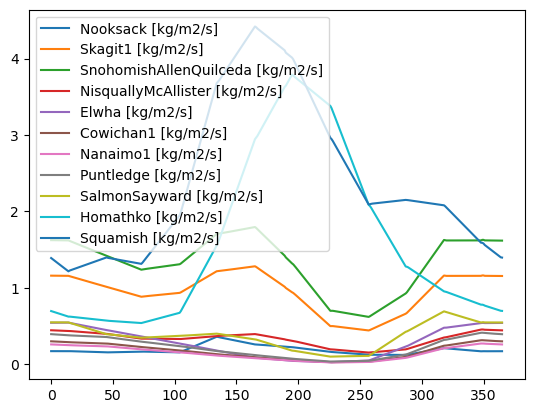

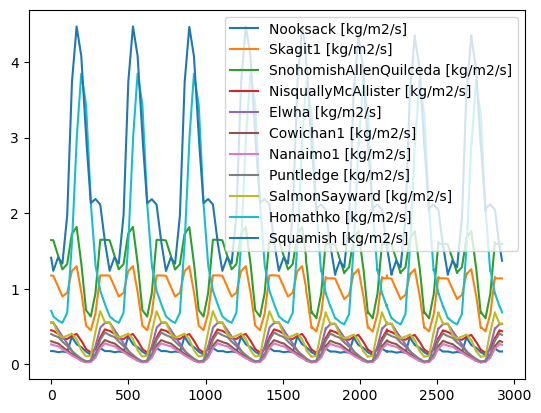

In [148]:
river_flows_201702 = pd.read_csv('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/river_dailies_to_ts_subset_201702_20130101_20201231.csv')
river_flows_201702 = river_flows_201702.loc[:, river_flows_201702.columns != 'Unnamed: 0']

river_flows_201702['date'] = pd.to_datetime(river_flows_201702['date'])
river_flows_201702['month'] = river_flows_201702['date'].dt.month
river_flows_201702['dayofyear'] = river_flows_201702['date'].dt.dayofyear
daily_clim_201702 = river_flows_201702.groupby(['dayofyear']).mean(numeric_only=True).reset_index()

daily_clim_201702.loc[:, (daily_clim_201702.columns != 'dayofyear') & (daily_clim_201702.columns != 'month')].plot()
river_flows_201702.loc[:, (river_flows_201702.columns != 'Unnamed: 0') & (river_flows_201702.columns != 'date') & (river_flows_201702.columns != 'month') & (river_flows_201702.columns != 'dayofyear')].plot()

In [158]:
season_dict = {'spring': [3, 4, 5], 'summer': [6, 7, 8], 'fall': [9, 10, 11], 'winter': [12, 1, 2]}

In [123]:
results_201905R, results_202111 = make_results_model('results_0_30_fall_noferry.csv', 'results_0_30_winter_noferry.csv', 'results_0_30_spring_noferry.csv', 'results_0_30_summer_noferry.csv')
# results_model_bar = results_201905R[['season', 'rmse', 'crmse', 'swillmott', 'systematic', 'nonsystematic', 'spread']]
results_model_bar = results_201905R[['season', 'rmse', 'crmse', 'systematic', 'nonsystematic']]  # remove both swmillmott and spread to put on other axes
categories = results_model_bar.loc[:, results_model_bar.columns != 'season'].columns.to_list()
categories

['rmse', 'crmse', 'systematic', 'nonsystematic']

In [162]:
color1 = '#4f8cf0'
color2 = '#162845'
color3 = '#345d9e'

color_spring = '#7ABB00'
color_summer = '#FFBF00'
color_fall = '#FF6F00'
color_winter = '#00C6C9'

dark_color_spring = '#446900'
dark_color_summer = '#a17800'
dark_color_fall = '#964100'
dark_color_winter = '#01797a'

line_spring = 'dotted'
line_summer = 'dashed'
line_fall = 'dashdot'
line_winter = (0, (3, 1, 1, 1, 1, 1))

## make the plots

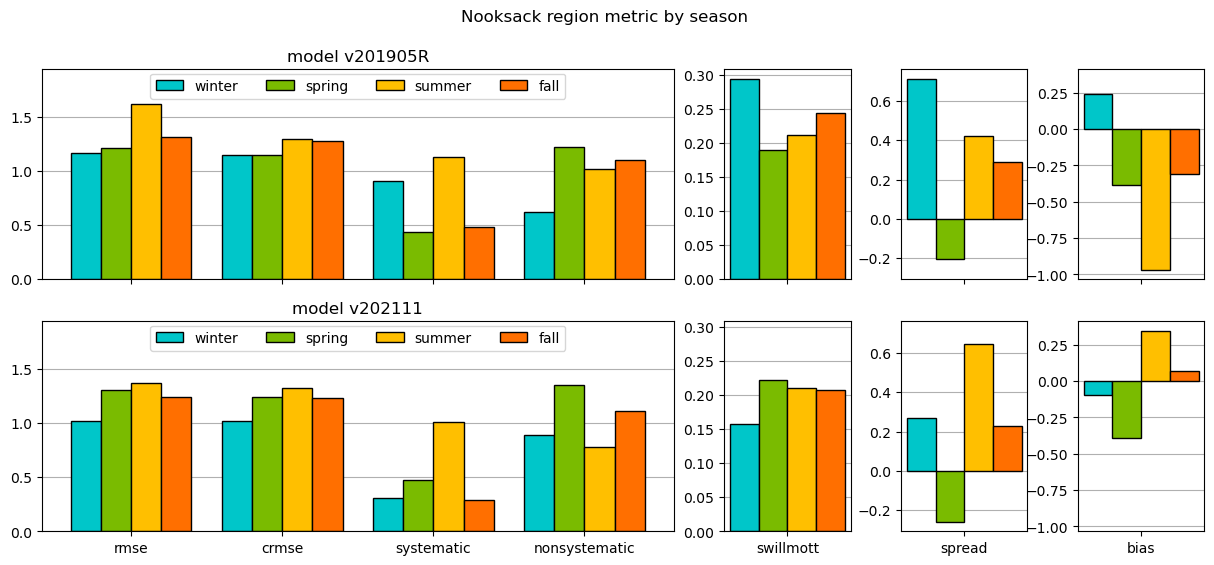

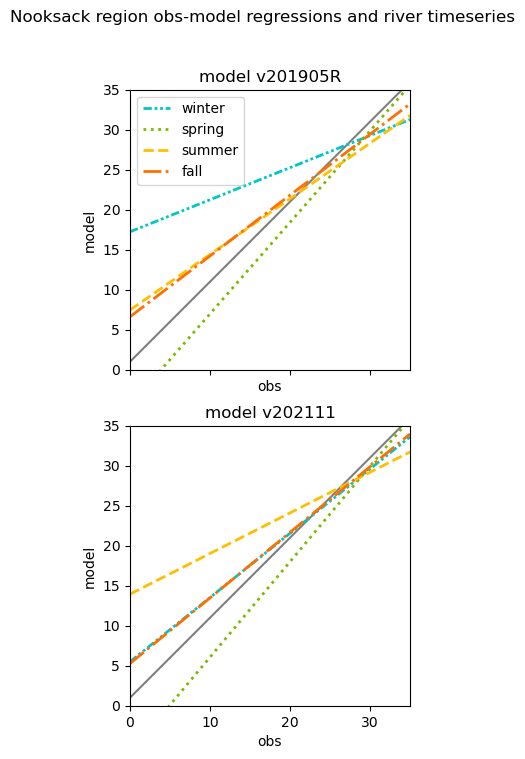

In [125]:
bar_chart(results_201905R, results_202111, categories, 'Nooksack')
regressions_and_ts(results_201905R, results_202111, 'Nooksack')

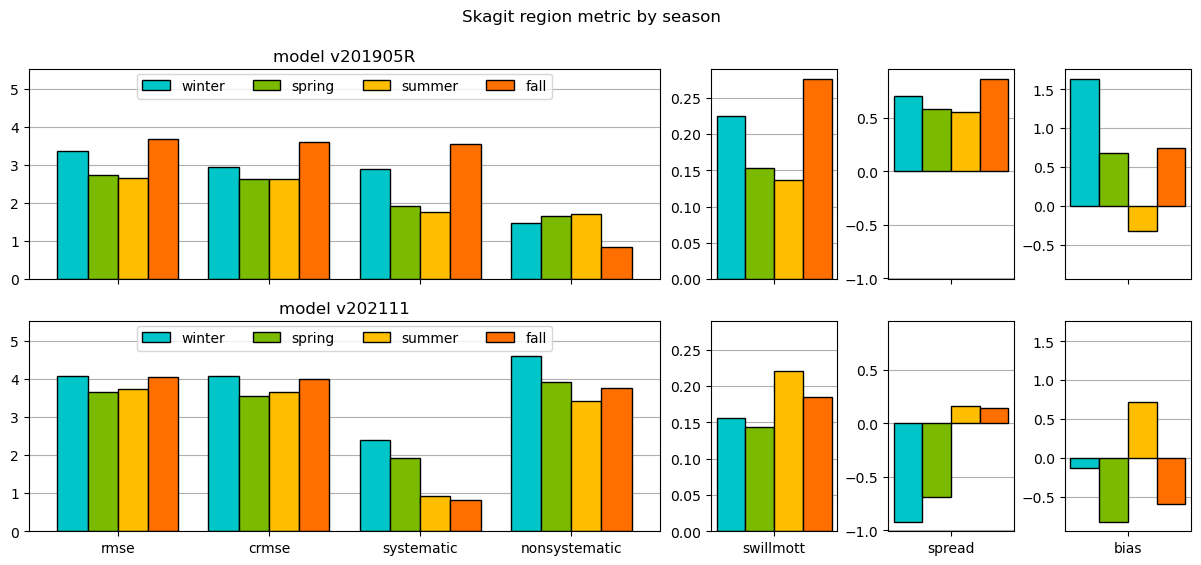

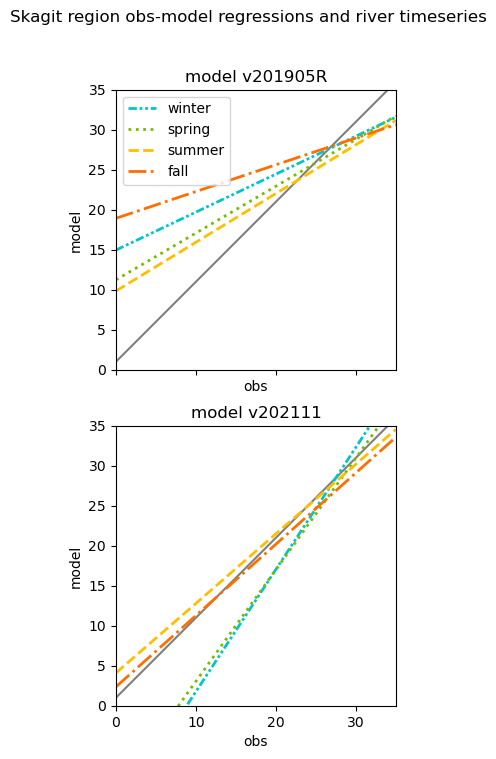

In [126]:
bar_chart(results_201905R, results_202111, categories, 'Skagit')
regressions_and_ts(results_201905R, results_202111, 'Skagit')

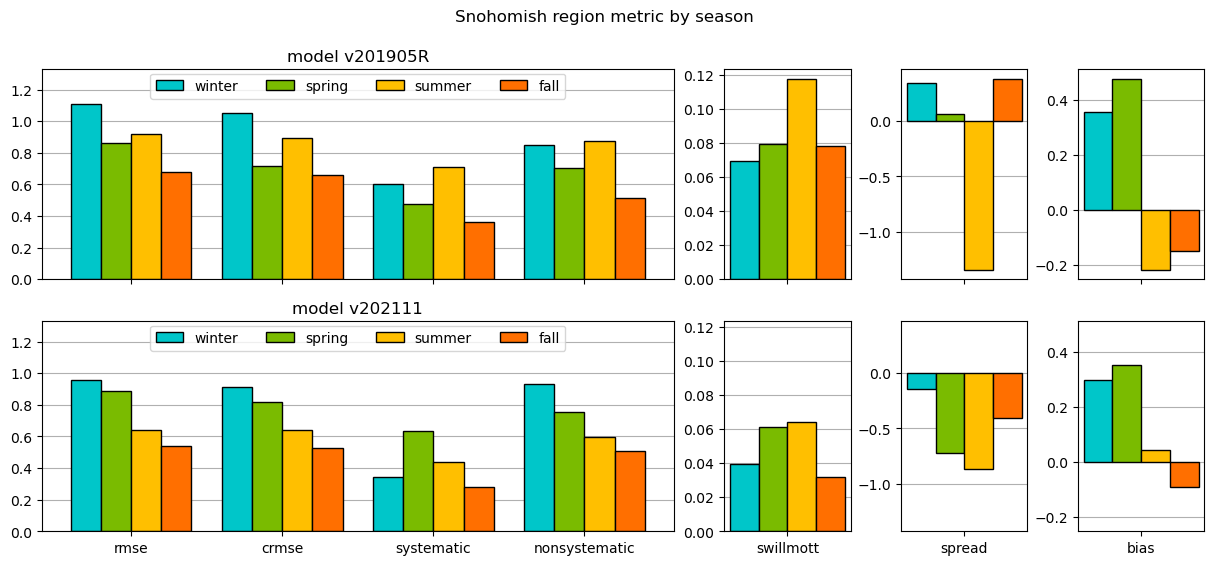

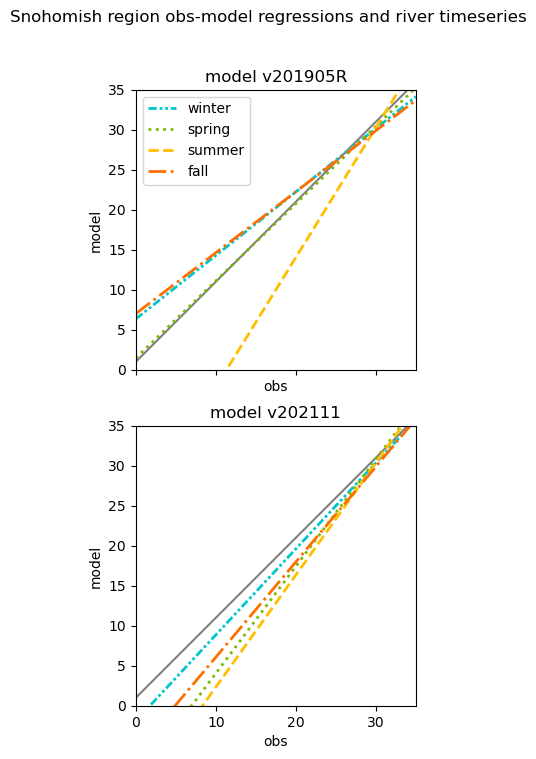

In [127]:
bar_chart(results_201905R, results_202111, categories, 'Snohomish')
regressions_and_ts(results_201905R, results_202111, 'Snohomish')

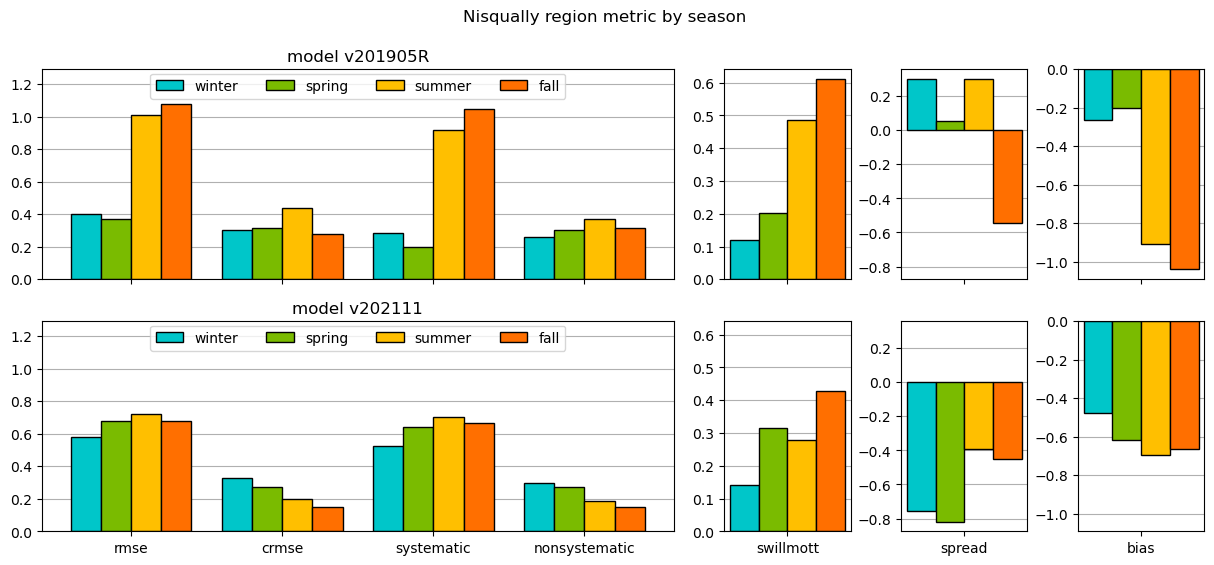

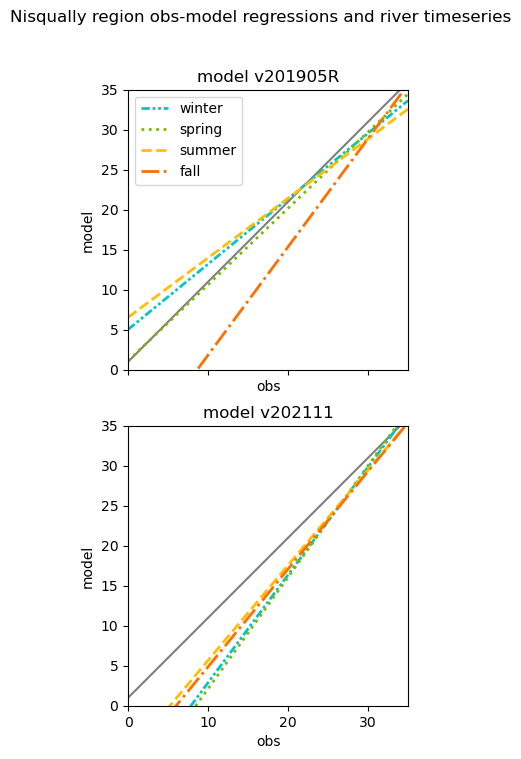

In [128]:
bar_chart(results_201905R, results_202111, categories, 'Nisqually')
regressions_and_ts(results_201905R, results_202111, 'Nisqually')

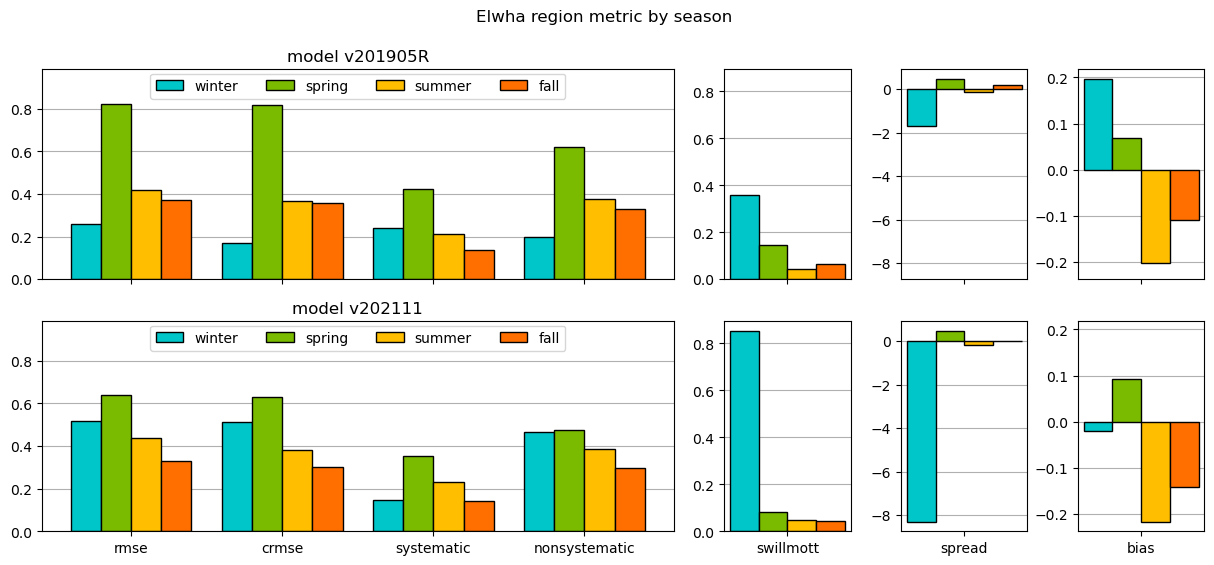

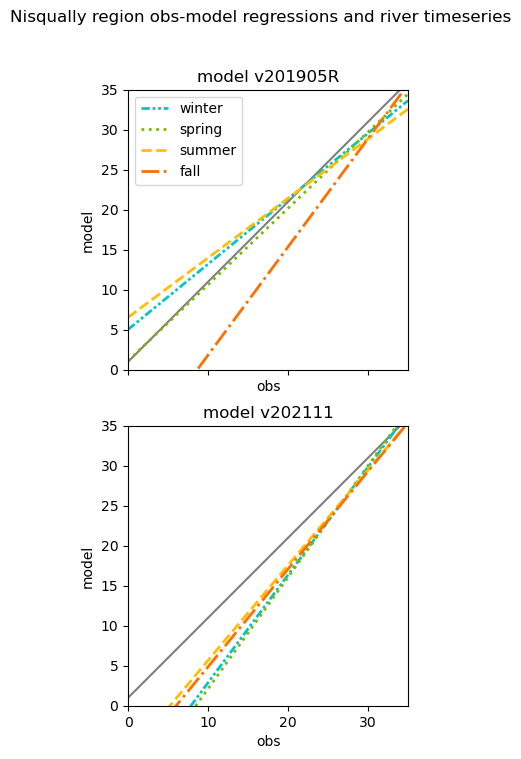

In [129]:
bar_chart(results_201905R, results_202111, categories, 'Elwha')
regressions_and_ts(results_201905R, results_202111, 'Nisqually')

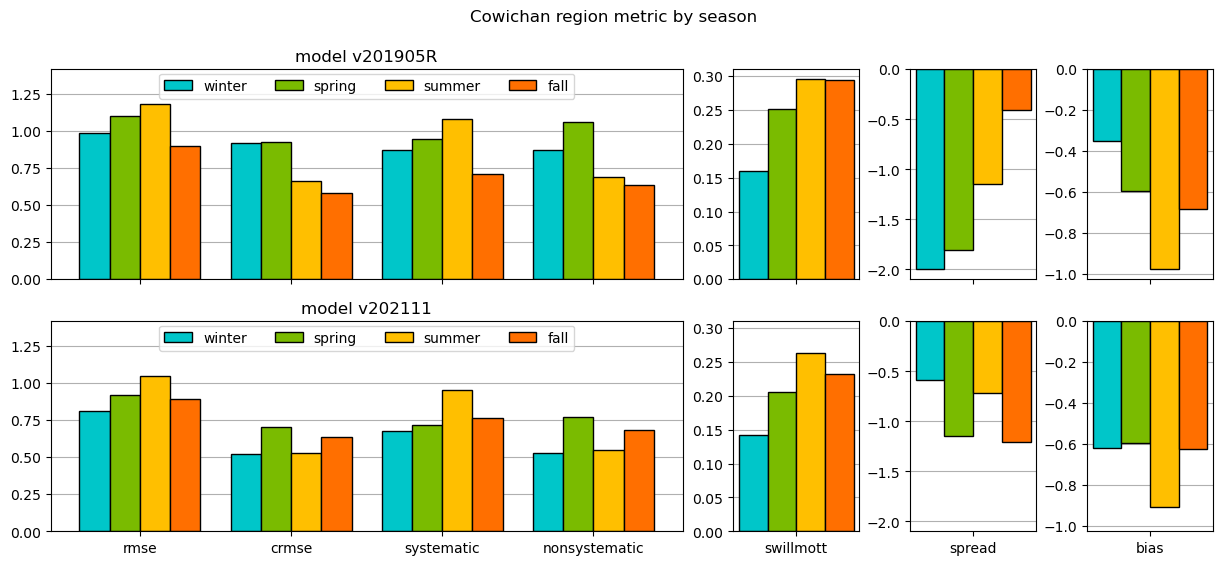

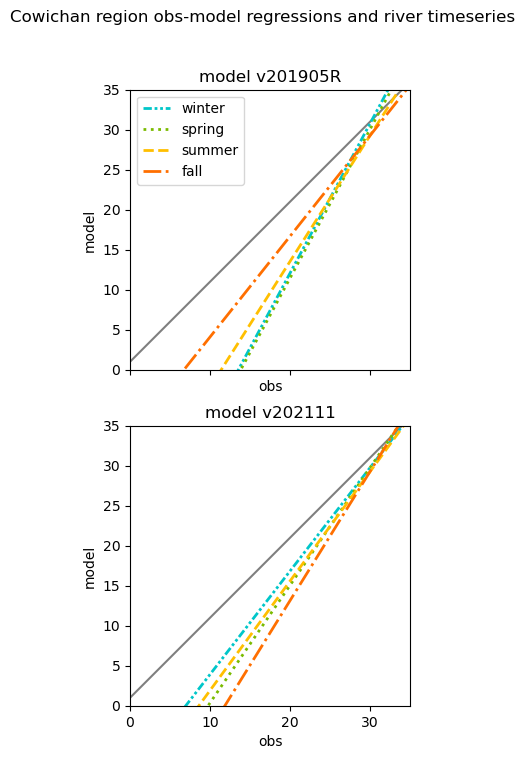

In [130]:
bar_chart(results_201905R, results_202111, categories, 'Cowichan')
regressions_and_ts(results_201905R, results_202111, 'Cowichan')

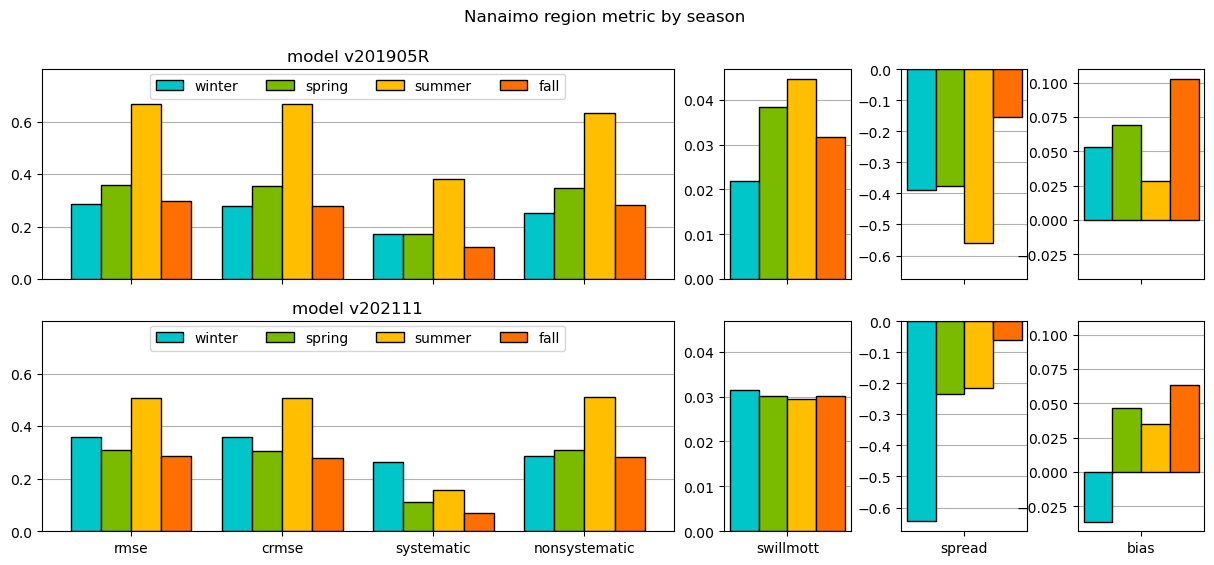

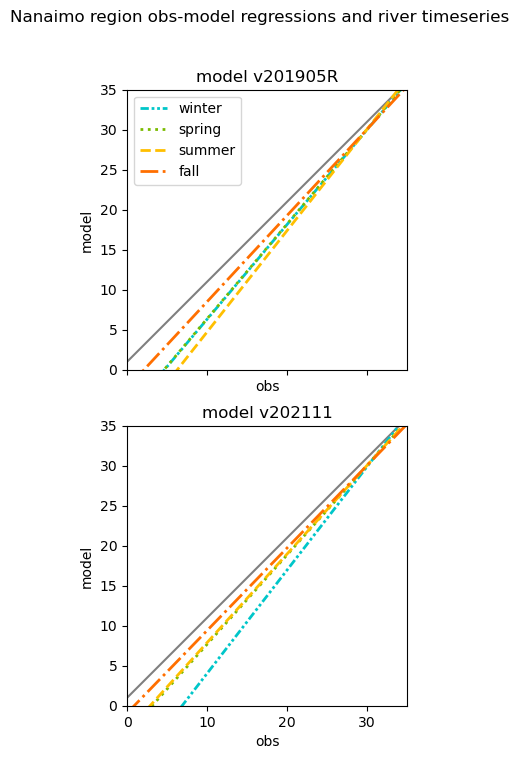

In [131]:
bar_chart(results_201905R, results_202111, categories, 'Nanaimo')
regressions_and_ts(results_201905R, results_202111, 'Nanaimo')

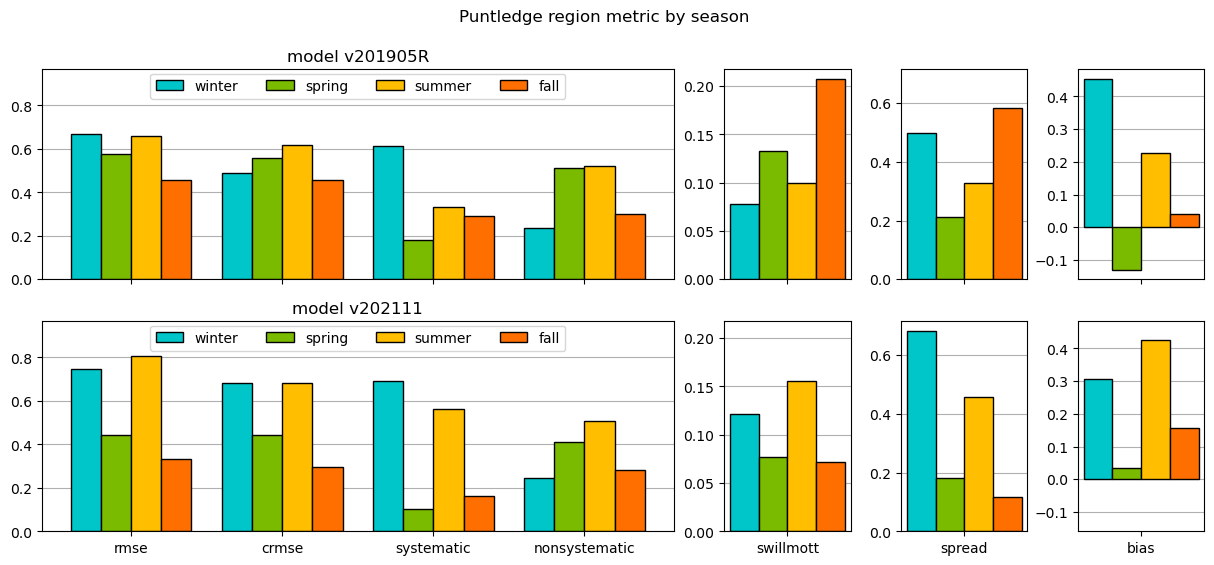

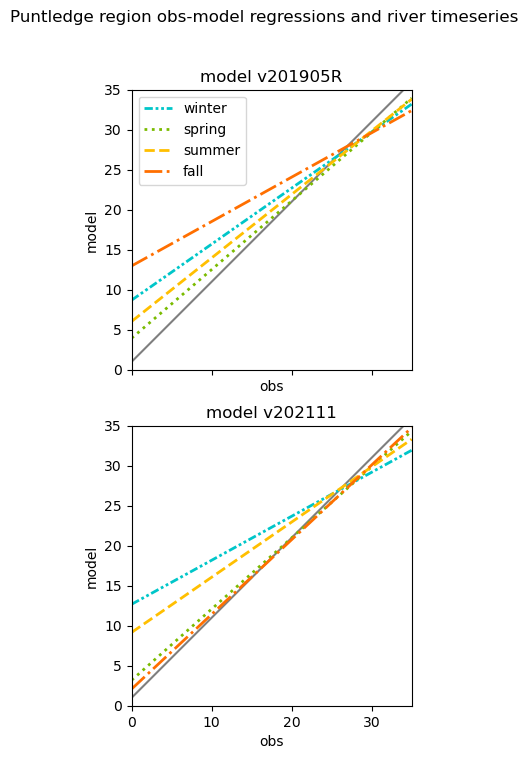

In [132]:
bar_chart(results_201905R, results_202111, categories, 'Puntledge')
regressions_and_ts(results_201905R, results_202111, 'Puntledge')

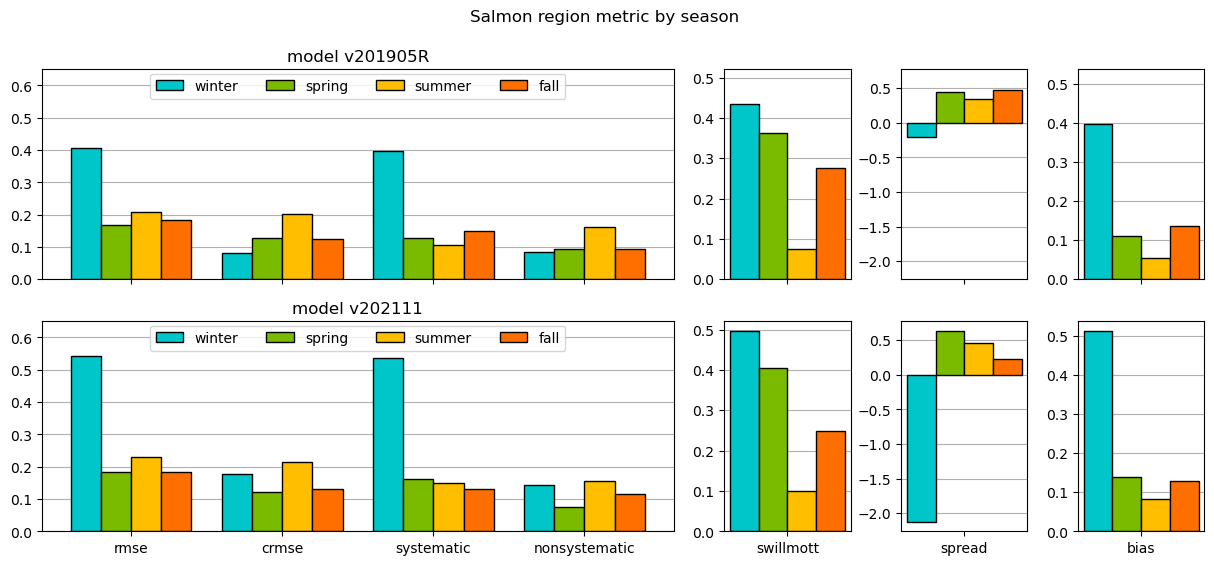

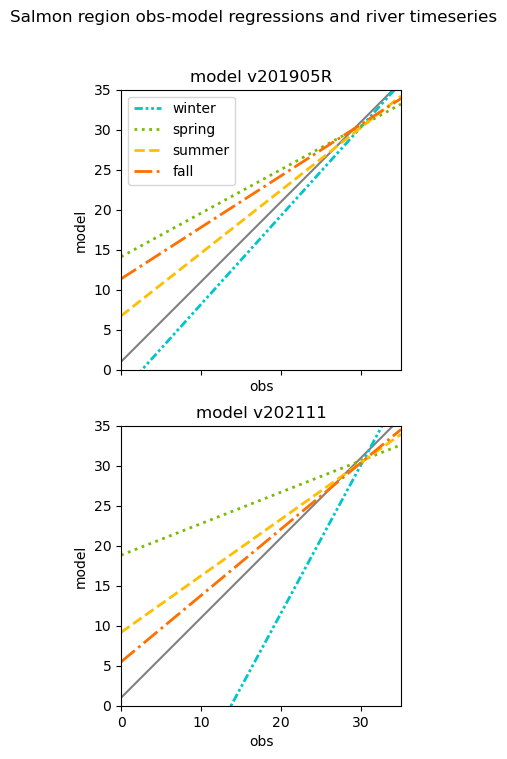

In [133]:
bar_chart(results_201905R, results_202111, categories, 'Salmon')
regressions_and_ts(results_201905R, results_202111, 'Salmon')

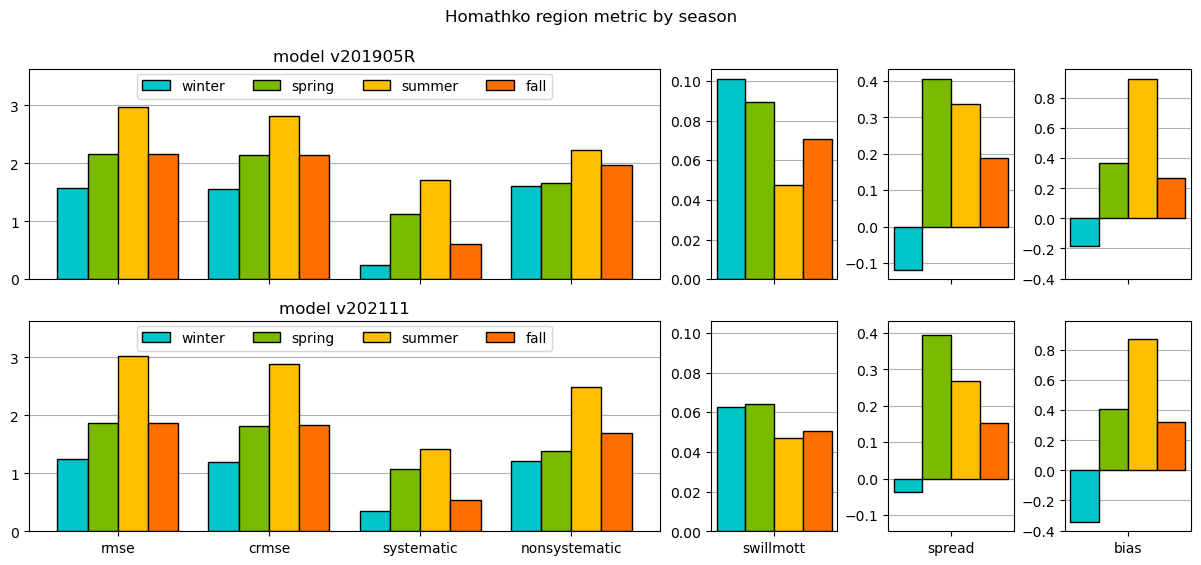

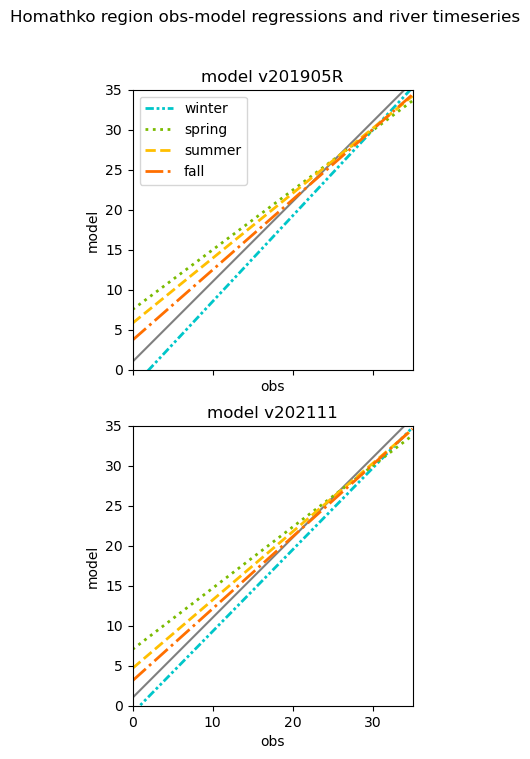

In [134]:
bar_chart(results_201905R, results_202111, categories, 'Homathko')
regressions_and_ts(results_201905R, results_202111, 'Homathko')

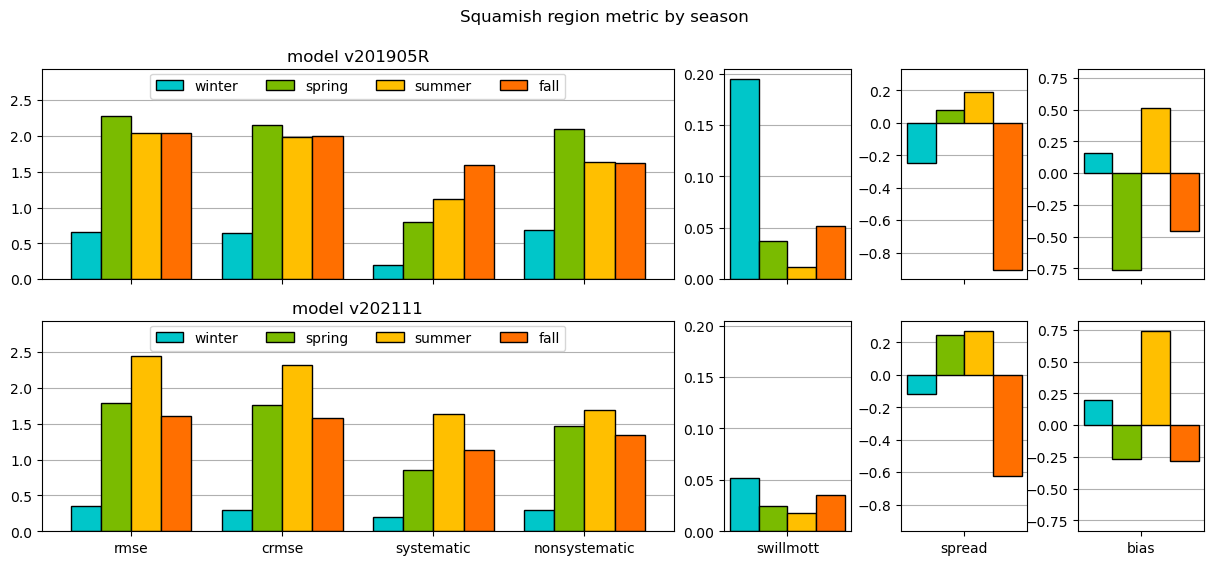

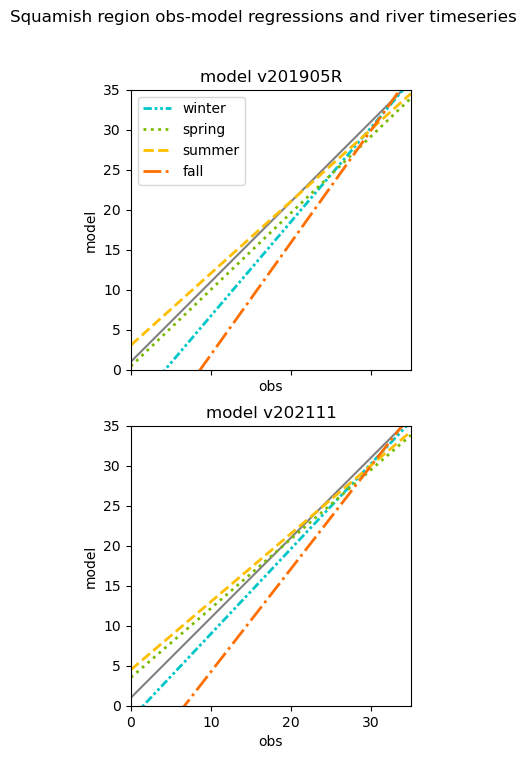

In [135]:
bar_chart(results_201905R, results_202111, categories, 'Squamish')
regressions_and_ts(results_201905R, results_202111, 'Squamish')

## Scratch work outside function

<BarContainer object of 1 artists>

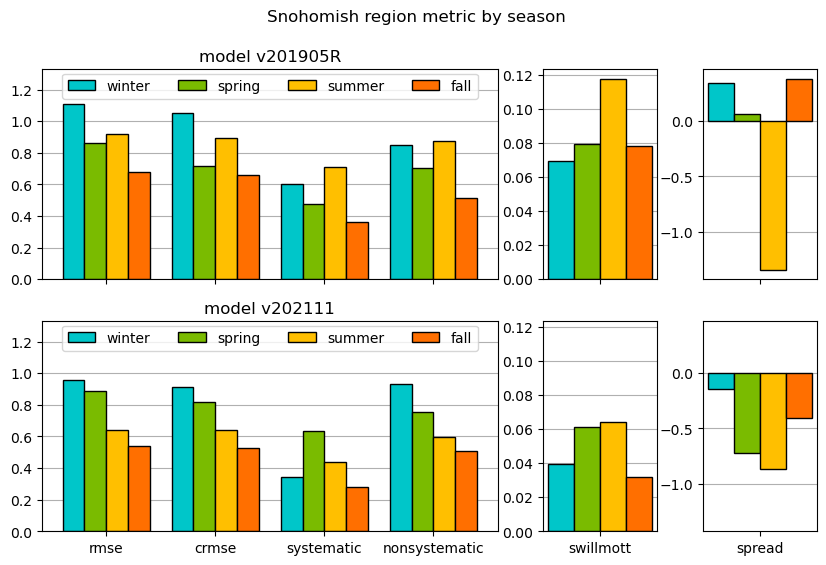

In [136]:
prod_region='Snohomish'

results_201905R_r = results_201905R[results_201905R['region'] == prod_region]
results_202111_r = results_202111[results_202111['region'] == prod_region]

fig, ax = plt.subplots(2, 3, figsize=(10, 6), sharex='col', sharey='col', gridspec_kw={'width_ratios': [4, 1, 1]})
fig.suptitle('{} region metric by season'.format(prod_region))

bar_width = 0.2
x = np.arange(len(categories))

## rmse, crmse, systematic, nonsystematic
ax[0,0].set_title('model v201905R')
ax[0,0].grid(axis='y', zorder=0)
ax[0,0].bar(x - 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][categories].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
ax[0,0].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][categories].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
ax[0,0].bar(x + 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][categories].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
ax[0,0].bar(x + 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][categories].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
ax[0,0].set_xticks(x, categories)
ax[0,0].legend(ncols=4, loc='center', bbox_to_anchor=(0.5, 0.92))
ax[0,0].set_ylim([0, 1.2*np.array([np.array(results_201905R_r[categories]).max(), np.array(results_202111_r[categories]).max()]).max()])

ax[1,0].set_title('model v202111')
ax[1,0].grid(axis='y', zorder=0)
ax[1,0].bar(x - 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter'][categories].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
ax[1,0].bar(x - 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring'][categories].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
ax[1,0].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer'][categories].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
ax[1,0].bar(x + 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall'][categories].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
ax[1,0].legend(ncols=4, loc='center', bbox_to_anchor=(0.5, 0.92))

## swillmott
x = np.array([0])
# ax[0,1].set_title('model v201905R')
ax[0,1].grid(axis='y', zorder=0)
ax[0,1].bar(x - 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][['swillmott']].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
ax[0,1].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][['swillmott']].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
ax[0,1].bar(x + 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][['swillmott']].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
ax[0,1].bar(x + 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][['swillmott']].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
ax[0,1].set_xticks(x, ['swillmott'])

# ax[1,1].set_title('model v202111')
ax[1,1].grid(axis='y', zorder=0)
ax[1,1].bar(x - 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter']['swillmott'].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
ax[1,1].bar(x - 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring']['swillmott'].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
ax[1,1].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer']['swillmott'].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
ax[1,1].bar(x + 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall']['swillmott'].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)

## spread
x = np.array([0])
# ax[0,2].set_title('model v201905R')
ax[0,2].grid(axis='y', zorder=0)
ax[0,2].bar(x - 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'winter'][['spread']].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
ax[0,2].bar(x - 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'spring'][['spread']].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
ax[0,2].bar(x + 0.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'summer'][['spread']].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
ax[0,2].bar(x + 1.5 * bar_width, results_201905R_r[results_201905R_r['season'] == 'fall'][['spread']].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
ax[0,2].set_xticks(x, ['spread'])

# ax[1,2].set_title('model v202111')
ax[1,2].grid(axis='y', zorder=0)
ax[1,2].bar(x - 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'winter']['spread'].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
ax[1,2].bar(x - 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'spring']['spread'].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
ax[1,2].bar(x + 0.5 * bar_width, results_202111_r[results_202111_r['season'] == 'summer']['spread'].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
ax[1,2].bar(x + 1.5 * bar_width, results_202111_r[results_202111_r['season'] == 'fall']['spread'].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)

Text(0.5, 0, 'Day of Year')

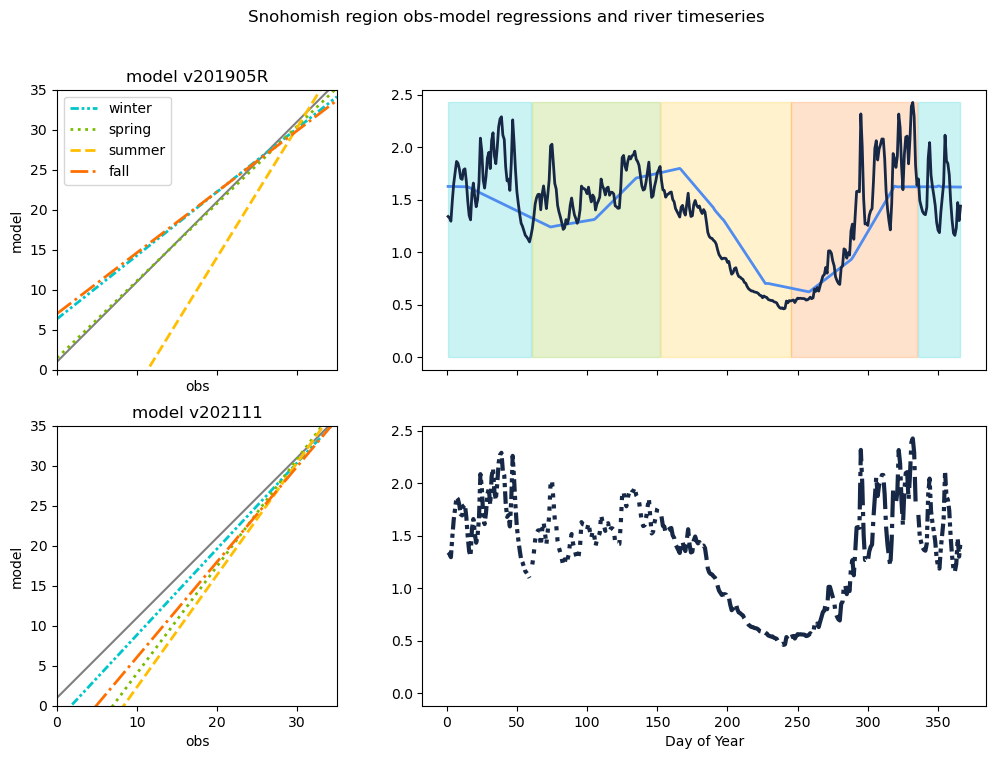

In [248]:
prod_region='Snohomish'

x_sal = np.linspace(0,35,100)
ideal_y = lin_fit(m=1, x=x_sal, b=1)

results_201905R_r = results_201905R[results_201905R['region'] == prod_region]
results_202111_r = results_202111[results_202111['region'] == prod_region]

fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharex='col', sharey='col', gridspec_kw={'width_ratios': [1, 2]})

fig.suptitle('{} region obs-model regressions and river timeseries'.format(prod_region))

## lines of fit
ax[0,0].set_aspect('equal')
ax[0,0].plot(x_sal, ideal_y, color='black', alpha=0.5)
ax[0,0].set_ylim([0,35])
ax[0,0].set_xlim([0,35])
ax[0,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_201905R_r[results_201905R_r['season'] == 'winter'][['slopedev']].values[0], b=results_201905R_r[results_201905R_r['season'] == 'winter'][['const']].values[0]), linestyle=line_winter, color=color_winter, label='winter', linewidth=2)
ax[0,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_201905R_r[results_201905R_r['season'] == 'spring'][['slopedev']].values[0], b=results_201905R_r[results_201905R_r['season'] == 'spring'][['const']].values[0]), linestyle=line_spring, color=color_spring, label='spring', linewidth=2)
ax[0,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_201905R_r[results_201905R_r['season'] == 'summer'][['slopedev']].values[0], b=results_201905R_r[results_201905R_r['season'] == 'summer'][['const']].values[0]), linestyle=line_summer, color=color_summer, label='summer', linewidth=2)
ax[0,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_201905R_r[results_201905R_r['season'] == 'fall'][['slopedev']].values[0], b=results_201905R_r[results_201905R_r['season'] == 'fall'][['const']].values[0]), linestyle=line_fall, color=color_fall, label='fall', linewidth=2)
ax[0,0].legend(loc='upper left')
ax[0,0].set_title('model v201905R')
ax[0,0].set_xlabel('obs')
ax[0,0].set_ylabel('model')

ax[1,0].set_aspect('equal')
ax[1,0].plot(x_sal, ideal_y, color='black', alpha=0.5)
ax[1,0].set_ylim([0,35])
ax[1,0].set_xlim([0,35])
ax[1,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_202111_r[results_202111_r['season'] == 'winter'][['slopedev']].values[0], b=results_202111_r[results_202111_r['season'] == 'winter'][['const']].values[0]), linestyle=line_winter, color=color_winter, label='winter', linewidth=2)
ax[1,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_202111_r[results_202111_r['season'] == 'spring'][['slopedev']].values[0], b=results_202111_r[results_202111_r['season'] == 'spring'][['const']].values[0]), linestyle=line_spring, color=color_spring, label='spring', linewidth=2)
ax[1,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_202111_r[results_202111_r['season'] == 'summer'][['slopedev']].values[0], b=results_202111_r[results_202111_r['season'] == 'summer'][['const']].values[0]), linestyle=line_summer, color=color_summer, label='summer', linewidth=2)
ax[1,0].plot(x_sal, lin_fit(x=x_sal, m=1-results_202111_r[results_202111_r['season'] == 'fall'][['slopedev']].values[0], b=results_202111_r[results_202111_r['season'] == 'fall'][['const']].values[0]), linestyle=line_fall, color=color_fall, label='fall', linewidth=2)
ax[1,0].set_title('model v202111')
ax[1,0].set_xlabel('obs')
ax[1,0].set_ylabel('model')

max_flow = np.array([daily_clim_202108[river_dict[prod_region]].max(), daily_clim_201702[river_dict[prod_region]].max()]).max()
rect_winter1 = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([1, 2])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([1, 2])].max(), max_flow, facecolor=color_winter, edgecolor=color_winter, alpha=0.2, zorder=0)
rect_winter2 = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])].min(), max_flow, facecolor=color_winter, edgecolor=color_winter, alpha=0.2, zorder=0)
rect_spring = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])].min()+1, max_flow, facecolor=color_spring, edgecolor=color_spring, alpha=0.2, zorder=0)
rect_summer = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])].min()+2, max_flow, facecolor=color_summer, edgecolor=color_summer, alpha=0.2, zorder=0)
rect_fall = patches.Rectangle((daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].min(),0), daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].max()-daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])].min()+1, max_flow, facecolor=color_fall, edgecolor=color_fall, alpha=0.2, zorder=0)

## timeseries
ax[0,1].add_patch(rect_winter1)
ax[0,1].add_patch(rect_winter2)
ax[0,1].add_patch(rect_spring)
ax[0,1].add_patch(rect_summer)
ax[0,1].add_patch(rect_fall)

ax[0,1].plot(daily_clim_201702['dayofyear'], daily_clim_201702[river_dict[prod_region]], color=color1, linewidth=2, zorder=3)
ax[0,1].plot(daily_clim_202108['dayofyear'], daily_clim_202108[river_dict[prod_region]], color=color2, linewidth=2, zorder=3)




# ax[1,1].plot(daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([1, 2])], daily_clim_202108[daily_clim_202108['month'].isin([1, 2])][river_dict[prod_region]], color=color_winter, linestyle=line_winter)
# ax[1,1].plot(daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])], daily_clim_202108[daily_clim_202108['month'].isin([12])][river_dict[prod_region]], color=color_winter, linestyle=line_winter)
# ax[1,1].plot(daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])], daily_clim_202108[daily_clim_202108['month'].isin(season_dict['spring'])][river_dict[prod_region]], color=color_spring, linestyle=line_spring)
# ax[1,1].plot(daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])], daily_clim_202108[daily_clim_202108['month'].isin(season_dict['summer'])][river_dict[prod_region]], color=color_summer, linestyle=line_summer)
# ax[1,1].plot(daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])], daily_clim_202108[daily_clim_202108['month'].isin(season_dict['fall'])][river_dict[prod_region]], color=color_fall, linestyle=line_fall)
ax[1,1].plot(daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([1, 2])], daily_clim_202108[daily_clim_202108['month'].isin([1, 2])][river_dict[prod_region]], linestyle=line_winter, linewidth=3, color=color2)
ax[1,1].plot(daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([12])], daily_clim_202108[daily_clim_202108['month'].isin([12])][river_dict[prod_region]], linestyle=line_winter, linewidth=3, color=color2)
ax[1,1].plot(daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['spring'])], daily_clim_202108[daily_clim_202108['month'].isin(season_dict['spring'])][river_dict[prod_region]], linestyle=line_spring, linewidth=3, color=color2)
ax[1,1].plot(daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['summer'])], daily_clim_202108[daily_clim_202108['month'].isin(season_dict['summer'])][river_dict[prod_region]], linestyle=line_summer, linewidth=3, color=color2)
ax[1,1].plot(daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin(season_dict['fall'])], daily_clim_202108[daily_clim_202108['month'].isin(season_dict['fall'])][river_dict[prod_region]], linestyle=line_fall, linewidth=3, color=color2)
ax[1,1].set_xlabel('Day of Year')


In [227]:
daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([1, 2])].max()

59

In [230]:
daily_clim_202108['dayofyear'][daily_clim_202108['month'].isin([2])]

31    32
32    33
33    34
34    35
35    36
36    37
37    38
38    39
39    40
40    41
41    42
42    43
43    44
44    45
45    46
46    47
47    48
48    49
49    50
50    51
51    52
52    53
53    54
54    55
55    56
56    57
57    58
58    59
Name: dayofyear, dtype: int64

<AxesSubplot: >

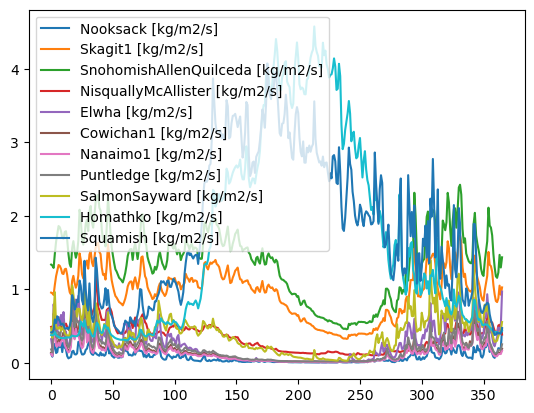

In [138]:
# river_dict = {'Nooksack': 'Nooksack [kg/m2/s]', 'Skagit': 'Skagit1 [kg/m2/s]', 'Snohomish': 'SnohomishAllenQuilceda [kg/m2/s]', 'Nisqually': 'NisquallyMcAllister [kg/m2/s]', 'Elwha': 'Elwha [kg/m2/s]', 'Cowichan': 'Cowichan1 [kg/m2/s]', \
#               'Nanaimo': 'Nanaimo1 [kg/m2/s]', 'Puntledge': 'Puntledge [kg/m2/s]', 'Salmon': 'SalmonSayward [kg/m2/s]', 'Homathko': 'Homathko [kg/m2/s]', 'Squamish': 'Squamish [kg/m2/s]'}

# river_flows_202108 = pd.read_csv('/ocean/cdonaldson/MOAD/analysis-cassidy/notebooks/river_dye_trace/river_dailies_to_ts_subset_202108_20130101_20201231.csv')
# river_flows_202108 = river_flows_202108.loc[:, river_flows_202108.columns != 'Unnamed: 0']

# river_flows_202108['date'] = pd.to_datetime(river_flows_202108['date'])
# river_flows_202108['month'] = river_flows_202108['date'].dt.month
# river_flows_202108['day'] = river_flows_202108['date'].dt.dayofyear
# daily_clim_202108 = river_flows_202108.groupby(['month', 'day']).mean()

daily_clim_202108.loc[:, (daily_clim_202108.columns != 'dayofyear') & (daily_clim_202108.columns != 'month')].plot()

In [139]:
season_dict = {'spring': [3, 4, 5], 'summer': [6, 7, 8], 'fall': [9, 10, 11], 'winter': [12, 1, 2]}
season_dict['winter']

daily_clim_202108['month'].isin(season_dict['fall'])

0      False
1      False
2      False
3      False
4      False
       ...  
361    False
362    False
363    False
364    False
365    False
Name: month, Length: 366, dtype: bool

In [155]:
daily_clim_202108[daily_clim_202108['month'].isin(season_dict['fall'])][river_dict[prod_region]]

244    0.533608
245    0.538462
246    0.542774
247    0.518808
248    0.543170
         ...   
329    2.073866
330    2.387196
331    2.424591
332    2.290266
333    1.824165
Name: SnohomishAllenQuilceda [kg/m2/s], Length: 88, dtype: float64